# 1. CNNs, Keras API and Regression


This assignment will give you a chance to familiarize yourself with CNNs and with the different
techniques for monitoring and controlling the training process in tensorflow. In this assignment,
we will look at weed leaves, in particular, we want to predict the number of leaves of the plant.
The more leaves, the more the weed has grown.
You must use Keras with the tensorflow backend, i.e., the package tensorflow.keras. For
this assignment, you may use other tensorflow packages and scikit-learn, scikit-image or pandas
but not other deep learning frameworks, e.g., pytorch, mxnet etc.

# 2. Data Preparation

The data for this assignment are plant images at different resolution captured with a variety of
cameras. There are images showing plants with approximatelty 1,2,3,4 and 6 leafs. The images are
part of a Leaf counting dataset by Teimouri et al. [1] which can be downloaded from the Aarhus
University, Denmark
https://vision.eng.au.dk/leaf-counting-dataset/
. However, you must work with the subset of images posted on BrightSpace as training.zip
and testing.zip. There are 200 images for each of the 5 classes. As Figure 1 shows, there is a
great variety of plants and image conditios. The dataset is split into a training and a testing set
where there are 180 images per class for training and validation; and 20 images for testing.

> First of all, we gather the data from the folders and label it. <br>
Then we resized the data into a 32 X 32 size.

In [ ]:
# import colab drive to access my drive and the data uploaded there.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import important libraries

import PIL
import os
from PIL import Image
import os
import skimage.io as skio
from skimage.transform import resize
import numpy as np
import pandas as pd
# get the location of the data
location = r'/content/drive/MyDrive/'

classes=['1','2','3','4','6']
# make array of the classes of the data

labels=[0,1,2,3,4]
# make a list of the folders that contain the data

folders=['training','testing']
# make empty lists to append to them each image
X_train=[]
X_test=[]
y_train=[]
y_test=[]

# for looping the folders and making a train, validation, and test images arrays

for ind , it in enumerate(folders):
    
    if it=='training':
        
        for ind_1,it_1 in enumerate(classes):

            for file in os.listdir(location+"/"+it+"/"+it_1):


                f_img = location+"/"+it+"/"+it_1+"/"+file
                img = skio.imread(f_img)
                img = resize(img,(32,32))
                X_train.append(img)
                y_train.append(labels[ind_1])
                
                
    elif it=='testing':
        
        for ind_1,it_1 in enumerate(classes):
            
            for file in os.listdir(location+"/"+it+"/"+it_1):
                

                f_img =location+"/"+it+"/"+it_1+"/"+file
                img = skio.imread(f_img)
                img = resize(img,(32,32))
                X_test.append(img)
                y_test.append(labels[ind_1])

    else:
        print("The destination file does not exist!")

        


Make sure of the data size

In [ ]:
len(X_test)

100

In [ ]:
y_test

convert the list into a numpy array that is used in further modeling

In [ ]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test) 

print('Matrix shape X: ', X_train.shape)
print('{0} samples for training'.format(X_train.shape[0]))
print('{0} samples for training'.format(X_test.shape[0]))

Matrix shape X:  (907, 32, 32, 3)
907 samples for training
100 samples for training


# 3. Basic Transfer Learning

For this assignment, you are asked to use the Keras implementation of VGG-16 as a starting point.
Have a look at the transfer learning example jupyter notebook mnistVGG.jypnb to get

## 3.1. Classification Network [3]

Using the first 2 blocks of VGG-16 add extra Keras layers to create your own version of a CNN
network for the classification of the images according to the number of leaves in the plant images.
Note that there will be 5 classes. The last layer from VGG-16 will be block2 pool and you are
allowed to add no more than five fully connected or convolutional layers to the network including
the final output layer. You can use as many pooling, flattening, 1 × 1 convolution layers, etc. as
you wish but do not use any regularization. Train this simple network on the training set while
monitoring convergence on the validation set. As input to the model use images of size no larger
than 128 × 128. Note, it is highly recommended to use even smaller input images to try things out.
You are not expected to fine-tune the initial VGG layers. Print your learning curves for training
and validation. Give the confusion matrix of your network on the training including validation
and testing data sets.

> get the vgg model and print its architecture

In [ ]:
# import keras from tensorflow as needed to import the vgg16 model

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
vgg = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
vgg.trainable = False ## Not trainable weights


58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
# print model summary
print(vgg.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

> Take till the block2 layers in the VGG layers

In [ ]:
from tensorflow.keras.models import Model
vgg_edited = Model(inputs=vgg.input, outputs=vgg.get_layer("block2_pool").output)

In [ ]:
print(vgg_edited.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
#import important libraries fot keras and keras layers
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout

In [ ]:
for layer in vgg_edited.layers:
    layer.trainable = False

# We will have to use the functional API    

# last layers output
x = vgg_edited.layers[-1].output
# Flatten as before
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(5, activation='softmax')(x)

from tensorflow.keras.models import Model
vgg_model_transfer = Model(inputs=vgg_edited.input, outputs=x)

In [ ]:
print(vgg_model_transfer.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:

y_train_k = tensorflow.keras.utils.to_categorical(y_train, num_classes=5)
y_test_k = tensorflow.keras.utils.to_categorical(y_test, num_classes=5)


In [ ]:
for i in range(0,200,20):
    print(y_train[i], " ", y_train_k[i,:])


0   [1. 0. 0. 0. 0.]
0   [1. 0. 0. 0. 0.]
0   [1. 0. 0. 0. 0.]
0   [1. 0. 0. 0. 0.]
0   [1. 0. 0. 0. 0.]
0   [1. 0. 0. 0. 0.]
0   [1. 0. 0. 0. 0.]
0   [1. 0. 0. 0. 0.]
0   [1. 0. 0. 0. 0.]
1   [0. 1. 0. 0. 0.]


In [ ]:
sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
vgg_model_transfer.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])


history = vgg_model_transfer.fit(X_train, y_train_k, batch_size=128, epochs=32, verbose=1, 
                                 validation_data=(X_test, y_test_k))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/32
8/8 [==============================] - 10s 109ms/step - loss: 32.9884 - accuracy: 0.2216 - val_loss: 1.8823 - val_accuracy: 0.2600
Epoch 2/32
8/8 [==============================] - 0s 19ms/step - loss: 1.7352 - accuracy: 0.2734 - val_loss: 1.7116 - val_accuracy: 0.3200
Epoch 3/32
8/8 [==============================] - 0s 18ms/step - loss: 1.5725 - accuracy: 0.3275 - val_loss: 1.6511 - val_accuracy: 0.3300
Epoch 4/32
8/8 [==============================] - 0s 18ms/step - loss: 1.5061 - accuracy: 0.3638 - val_loss: 1.7914 - val_accuracy: 0.2200
Epoch 5/32
8/8 [==============================] - 0s 18ms/step - loss: 1.4804 - accuracy: 0.3826 - val_loss: 1.6256 - val_accuracy: 0.3400
Epoch 6/32
8/8 [==============================] - 0s 18ms/step - loss: 1.4021 - accuracy: 0.4057 - val_loss: 1.7292 - val_accuracy: 0.3000
Epoch 7/32
8/8 [==============================] - 0s 18ms/step - loss: 1.3786 - accuracy: 0.4399 - val_loss: 1.6397 - val_accuracy: 0.3100
Epoch 8/32
8/8 [========

In [ ]:
y_predict_prob = vgg_model_transfer.predict(X_test)


In [ ]:
y_predict = y_predict_prob.argmax(axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test, y_predict)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[14  4  0  2  0]
 [ 6 11  0  3  0]
 [ 5  8  3  4  0]
 [ 4  5  2  8  1]
 [ 2 10  2  2  4]]


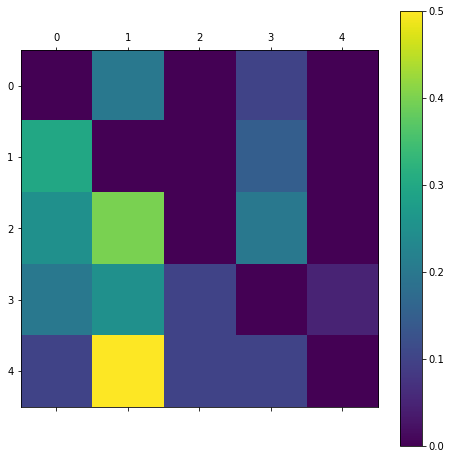

In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
    
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.45      0.70      0.55        20
           1       0.29      0.55      0.38        20
           2       0.43      0.15      0.22        20
           3       0.42      0.40      0.41        20
           4       0.80      0.20      0.32        20

    accuracy                           0.40       100
   macro avg       0.48      0.40      0.38       100
weighted avg       0.48      0.40      0.38       100



### Learning Curves

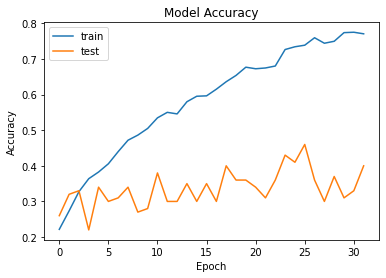

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


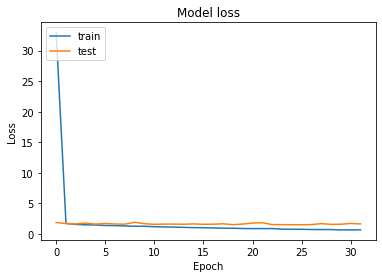

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



## 3.2. Basic Transfer Learning: Regression Network [2]

Repeat the steps of Question 3.1 but turn it into a regression problem, i.e., your network needs to
output a single float value ranging between 0 to 6 corresponding to the number of leaves. Again,
please print your learning curves for training and validation. You are not expected to fine-tune
the initial VGG layers. Give your mean squared error on training including validation and testing
data sets.

In [ ]:
vgg_edited = Model(inputs=vgg.input, outputs=vgg.get_layer("block2_pool").output)
for layer in vgg_edited.layers:
    layer.trainable = False

# We will have to use the functional API    

# last layers output
x = vgg_edited.layers[-1].output
# Flatten as before
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(1, kernel_initializer='normal',activation='linear')(x)
from tensorflow.keras.models import Model
vgg_model_transfer_linear = Model(inputs=vgg_edited.input, outputs=x)

In [ ]:
sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
vgg_model_transfer_linear.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])


history = vgg_model_transfer_linear.fit(X_train, y_train_k, batch_size=128, epochs=50, verbose=1, 
                                 validation_data=(X_test, y_test_k))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
8/8 [==============================] - 1s 45ms/step - loss: 1.0658 - mean_absolute_error: 1.0658 - val_loss: 0.2017 - val_mean_absolute_error: 0.2017
Epoch 2/50
8/8 [==============================] - 0s 24ms/step - loss: 0.2003 - mean_absolute_error: 0.2003 - val_loss: 0.2002 - val_mean_absolute_error: 0.2002
Epoch 3/50
8/8 [==============================] - 0s 23ms/step - loss: 0.2002 - mean_absolute_error: 0.2002 - val_loss: 0.2001 - val_mean_absolute_error: 0.2001
Epoch 4/50
8/8 [==============================] - 0s 22ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - val_loss: 0.2001 - val_mean_absolute_error: 0.2001
Epoch 5/50
8/8 [==============================] - 0s 23ms/step - loss: 0.2001 - mean_absolute_error: 0.2001 - val_loss: 0.2000 - val_mean_absolute_error: 0.2000
Epoch 6/50
8/8 [==============================] - 0s 22ms/step - loss: 0.2001 - mean_absolute_error: 0.2001 - val_loss: 0.2000 - val_mean_absolute_error: 0.2000
Epoch 7/50
8/8 [==================

In [ ]:
y_predict_prob = vgg_model_transfer_linear.predict(X_test)
y_predict = y_predict_prob.argmax(axis=-1)
conf_mx = confusion_matrix(y_test, y_predict)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[20  0  0  0  0]
 [20  0  0  0  0]
 [20  0  0  0  0]
 [20  0  0  0  0]
 [20  0  0  0  0]]


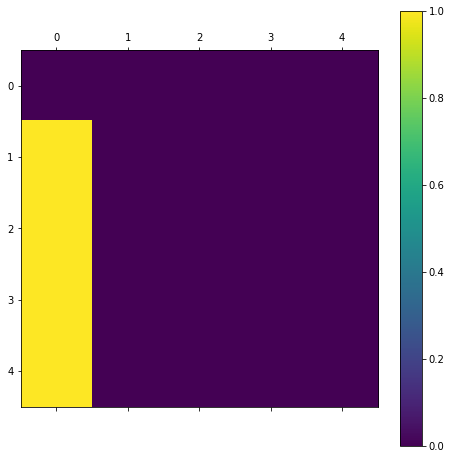

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
plt.show()

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20

    accuracy                           0.20       100
   macro avg       0.04      0.20      0.07       100
weighted avg       0.04      0.20      0.07       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Learning Curves

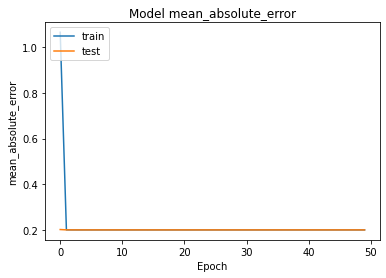

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'mean_absolute_error' in history.history :
    k = 'mean_absolute_error'    


if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model mean_absolute_error')
    plt.ylabel('mean_absolute_error')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


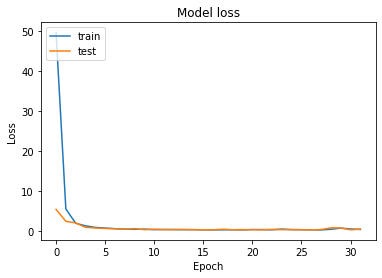

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



Classification report on training data

In [ ]:
y_predict_prob_train = vgg_model_transfer_linear.predict(X_train)
y_predict_train = y_predict_prob_train.argmax(axis=-1)
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33       180
           1       0.00      0.00      0.00       180
           2       0.00      0.00      0.00       187
           3       0.00      0.00      0.00       180
           4       0.00      0.00      0.00       180

    accuracy                           0.20       907
   macro avg       0.04      0.20      0.07       907
weighted avg       0.04      0.20      0.07       907



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report on testing data

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20

    accuracy                           0.20       100
   macro avg       0.04      0.20      0.07       100
weighted avg       0.04      0.20      0.07       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3.3. Discussion [1]

The size of the training data is quite small. Discuss based on your learning curves if overfitting is
occurring with your networks in Question 3.1 and Question 3.2.

> 3.1 Model
>> The model is overfitted, the test accuracy is very low in comparison with the training accuracy, the training accuracy is up to 80% while the test accuracy is only 40%.
The model fails to generalize the data and find the hidden patterns in it.
The test loss is fixed, and not decreasing as epochs go, hence the more we increase the number of epochs the same performance we have.
The overall accuracy is 40% which is poor performance.
The highest f1 score is 55% for the first class which is very fair performace.
The lowest f1 score was recorded for the the third class which represents tri-plants.



> 3.2 Model
>> The model is extremely under fitted, the overall accuracy is 20% in both training and testing data.
The model fails to predicts properly all classes except for the first class.
The model predicts it only, however with a very low f1 score of 33%. increasing number of epochs even up to 50 epoch does not have any impact on the performance.<br>

# 4. Improving the Model

Regularization and data augmentation are common strategies to deal with small datasets.

## 4.1. Regularization [1.5]

Incorporate two regularization methods (e.g., Batch Normalization, Dropout, Weight Normaliza-
tion etc.) into your layers of the network. Please pick the model from Question 3.1 and Question 3.2
that performs better. You are not expected to fine-tune the initial VGG layers. Again, please
print your learning curves for training and validation and print the corresponding metrics for your
model.

## We picked the classification model eather than the regression model as it's a way better.

### Batch Normalization

In [ ]:
from keras.layers import BatchNormalization


vgg = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
vgg.trainable = False ## Not trainable weights
vgg_edited = Model(inputs=vgg.input, outputs=vgg.get_layer("block2_pool").output)
for layer in vgg_edited.layers:
    layer.trainable = False
flat1 = Flatten()(vgg_edited.layers[-1].output)
t=BatchNormalization()(flat1)
class1 = Dense(256, activation='relu')(t)
tt=BatchNormalization()(class1)
output = Dense(5, activation='softmax')(tt)

model_reg = Model(inputs=vgg_edited.inputs, outputs=output)
model_reg.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:
y_train_k = tensorflow.keras.utils.to_categorical(y_train, num_classes=5)
y_test_k = tensorflow.keras.utils.to_categorical(y_test, num_classes=5)

sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
model_reg.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])


history = model_reg.fit(X_train, y_train_k, batch_size=128, epochs=50, verbose=1, 
                                 validation_data=(X_test, y_test_k))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
8/8 [==============================] - 1s 64ms/step - loss: 2.1617 - accuracy: 0.2337 - val_loss: 14.7167 - val_accuracy: 0.1900
Epoch 2/50
8/8 [==============================] - 0s 25ms/step - loss: 2.0283 - accuracy: 0.2635 - val_loss: 11.0588 - val_accuracy: 0.1700
Epoch 3/50
8/8 [==============================] - 0s 23ms/step - loss: 1.9009 - accuracy: 0.2878 - val_loss: 8.9752 - val_accuracy: 0.1600
Epoch 4/50
8/8 [==============================] - 0s 23ms/step - loss: 1.7780 - accuracy: 0.3241 - val_loss: 7.4226 - val_accuracy: 0.1700
Epoch 5/50
8/8 [==============================] - 0s 24ms/step - loss: 1.6661 - accuracy: 0.3407 - val_loss: 6.4505 - val_accuracy: 0.1700
Epoch 6/50
8/8 [==============================] - 0s 25ms/step - loss: 1.5866 - accuracy: 0.3826 - val_loss: 5.5442 - val_accuracy: 0.1900
Epoch 7/50
8/8 [==============================] - 0s 24ms/step - loss: 1.5209 - accuracy: 0.4157 - val_loss: 4.8648 - val_accuracy: 0.1900
Epoch 8/50
8/8 [=========

In [ ]:
y_predict_prob = model_reg.predict(X_test)
y_predict = y_predict_prob.argmax(axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test, y_predict)
conf_mx

array([[12,  3,  3,  1,  1],
       [ 8,  6,  3,  2,  1],
       [ 3,  4,  3,  5,  5],
       [ 2,  1,  4,  4,  9],
       [ 5,  3,  1,  6,  5]])

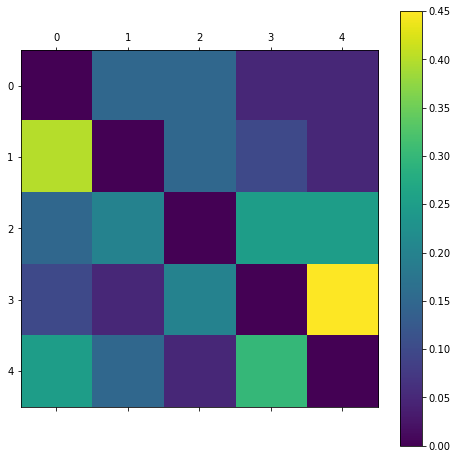

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
plt.show()


In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.40      0.60      0.48        20
           1       0.35      0.30      0.32        20
           2       0.21      0.15      0.18        20
           3       0.22      0.20      0.21        20
           4       0.24      0.25      0.24        20

    accuracy                           0.30       100
   macro avg       0.29      0.30      0.29       100
weighted avg       0.29      0.30      0.29       100



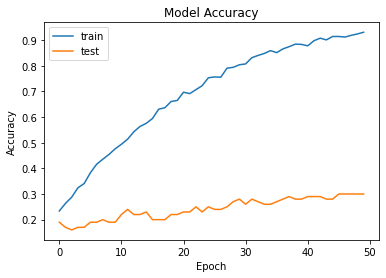

In [ ]:
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

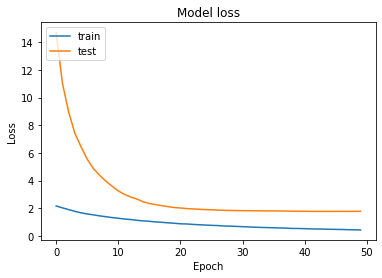

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



## Dropout

In [ ]:
vgg = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
vgg.trainable = False ## Not trainable weights
vgg_edited = Model(inputs=vgg.input, outputs=vgg.get_layer("block2_pool").output)
for layer in vgg_edited.layers:
    layer.trainable = False
flat1 = Flatten()(vgg_edited.layers[-1].output)
t=Dropout(0.5)(flat1)
class1 = Dense(256, activation='relu')(t)
tt=Dropout(0.5)(class1)
output = Dense(5, activation='softmax')(tt)

model_d = Model(inputs=vgg_edited.inputs, outputs=output)
model_d.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0  

In [ ]:
y_train_k = tensorflow.keras.utils.to_categorical(y_train, num_classes=5)
y_test_k = tensorflow.keras.utils.to_categorical(y_test, num_classes=5)

sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
model_d.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])


history = model_d.fit(X_train, y_train_k, batch_size=128, epochs=50, verbose=1, 
                                 validation_data=(X_test, y_test_k))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
8/8 [==============================] - 1s 54ms/step - loss: 20.1300 - accuracy: 0.1940 - val_loss: 7.1578 - val_accuracy: 0.2100
Epoch 2/50
8/8 [==============================] - 0s 25ms/step - loss: 8.8214 - accuracy: 0.2007 - val_loss: 2.3741 - val_accuracy: 0.2100
Epoch 3/50
8/8 [==============================] - 0s 23ms/step - loss: 5.2143 - accuracy: 0.2271 - val_loss: 1.7475 - val_accuracy: 0.2300
Epoch 4/50
8/8 [==============================] - 0s 21ms/step - loss: 3.7995 - accuracy: 0.2249 - val_loss: 1.6246 - val_accuracy: 0.2000
Epoch 5/50
8/8 [==============================] - 0s 22ms/step - loss: 2.8151 - accuracy: 0.2393 - val_loss: 1.6086 - val_accuracy: 0.1600
Epoch 6/50
8/8 [==============================] - 0s 22ms/step - loss: 2.6000 - accuracy: 0.2216 - val_loss: 1.6105 - val_accuracy: 0.1600
Epoch 7/50
8/8 [==============================] - 0s 21ms/step - loss: 2.2619 - accuracy: 0.2359 - val_loss: 1.6047 - val_accuracy: 0.2200
Epoch 8/50
8/8 [==========

In [ ]:
y_predict_prob = model_d.predict(X_test)
y_predict = y_predict_prob.argmax(axis=-1)

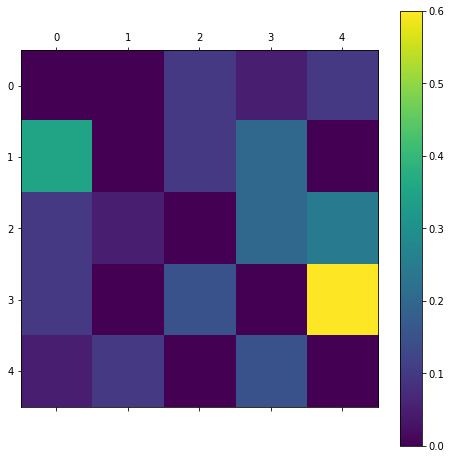

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
plt.show()

In [ ]:
y_predict_prob_train = model_d.predict(X_train)
y_predict_train = y_predict_prob_train.argmax(axis=-1)
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.21      0.91      0.35       180
           1       0.30      0.23      0.26       180
           2       0.00      0.00      0.00       187
           3       1.00      0.01      0.01       180
           4       0.25      0.01      0.01       180

    accuracy                           0.23       907
   macro avg       0.35      0.23      0.13       907
weighted avg       0.35      0.23      0.12       907



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.20      0.85      0.32        20
           1       0.23      0.15      0.18        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20

    accuracy                           0.20       100
   macro avg       0.09      0.20      0.10       100
weighted avg       0.09      0.20      0.10       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


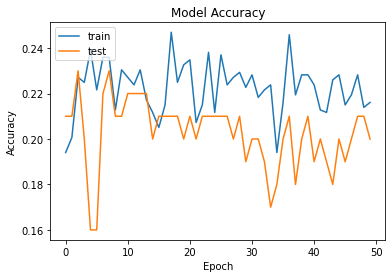

In [ ]:
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

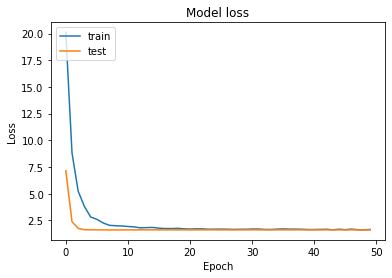

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## 5. Data Augmentation [1.5]

Perform data augmentation for training the same model as in Question 4.1. You are not expected
to fine-tune the initial VGG layers. Again, please print your learning curves for training and
validation and print the corresponding metrics for your model.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# we are using horizontal, vertical , rotation and zooming augmentation
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.002,
        height_shift_range=0.002,
         zoom_range=0.01,
         horizontal_flip=True,
        fill_mode='nearest')

In [ ]:
vgg = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
vgg.trainable = False ## Not trainable weights
vgg_edited = Model(inputs=vgg.input, outputs=vgg.get_layer("block2_pool").output)

In [ ]:
for layer in vgg_edited.layers:
    layer.trainable = False

# We will have to use the functional API    

# last layers output
x = vgg_edited.layers[-1].output
# Flatten as before
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(5, activation='softmax')(x)

from tensorflow.keras.models import Model
model_aug = Model(inputs=vgg_edited.input, outputs=x)

In [ ]:
y_train_k = tensorflow.keras.utils.to_categorical(y_train, num_classes=5)
y_test_k = tensorflow.keras.utils.to_categorical(y_test, num_classes=5)


In [ ]:
sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
model_aug.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])
history = model_aug.fit(datagen.flow(X_train, y_train_k), batch_size=128, epochs=50, verbose=1, 
                                 validation_data=(X_test, y_test_k))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
29/29 [==============================] - 2s 38ms/step - loss: 10.0929 - accuracy: 0.2304 - val_loss: 1.6410 - val_accuracy: 0.2400
Epoch 2/50
29/29 [==============================] - 1s 29ms/step - loss: 1.6138 - accuracy: 0.2922 - val_loss: 1.5873 - val_accuracy: 0.2700
Epoch 3/50
29/29 [==============================] - 1s 29ms/step - loss: 1.5587 - accuracy: 0.3076 - val_loss: 1.5954 - val_accuracy: 0.3100
Epoch 4/50
29/29 [==============================] - 1s 30ms/step - loss: 1.4970 - accuracy: 0.3374 - val_loss: 1.6252 - val_accuracy: 0.2300
Epoch 5/50
29/29 [==============================] - 1s 31ms/step - loss: 1.4905 - accuracy: 0.3484 - val_loss: 1.5542 - val_accuracy: 0.3200
Epoch 6/50
29/29 [==============================] - 1s 29ms/step - loss: 1.4189 - accuracy: 0.3947 - val_loss: 1.5887 - val_accuracy: 0.3400
Epoch 7/50
29/29 [==============================] - 1s 28ms/step - loss: 1.4104 - accuracy: 0.4057 - val_loss: 1.5446 - val_accuracy: 0.2800
Epoch 8/50
2

In [ ]:
y_predict_prob = model_aug.predict(X_test)
y_predict = y_predict_prob.argmax(axis=-1)
conf_mx = confusion_matrix(y_test, y_predict)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[15  0  2  1  2]
 [ 7  7  2  4  0]
 [ 2  1  8  4  5]
 [ 2  0  3  3 12]
 [ 1  2  0  3 14]]


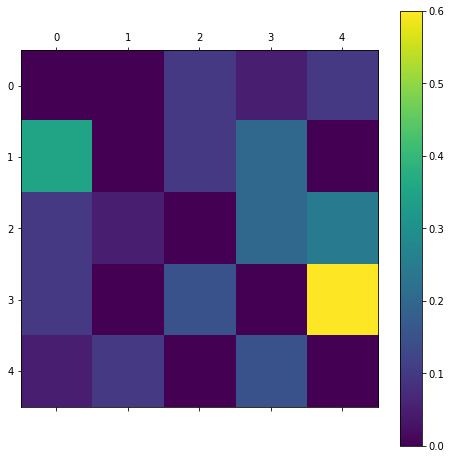

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
plt.show()

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.56      0.75      0.64        20
           1       0.70      0.35      0.47        20
           2       0.53      0.40      0.46        20
           3       0.20      0.15      0.17        20
           4       0.42      0.70      0.53        20

    accuracy                           0.47       100
   macro avg       0.48      0.47      0.45       100
weighted avg       0.48      0.47      0.45       100



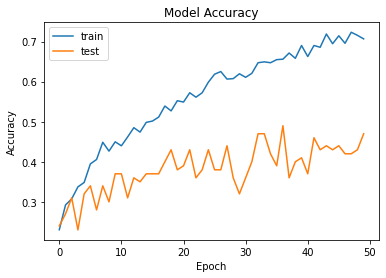

In [ ]:
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


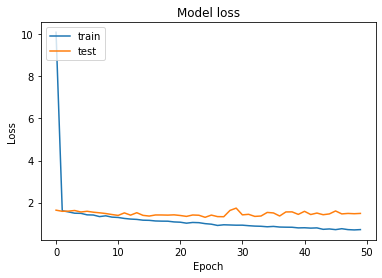

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



## 5.1. Discussion [1]

Discuss based on your learning curves and final metrics in Question 4.1 and in Question 5, how
large a improvement can be observed from regularization and data augmentation.

> classification model with batch normalization
>> The model keeps overfitting, however the model is worest than the baseline, the training accuracy was up to 90% ,but the test accuracy is only 30%!.
The f1 score has decreased for all classes, the highest fq score id 48% for the first class and the lowest f1 score is 18% for the tri-plants as before.

>classification model with dropout
>> The model very under fitted, the training accuracy is only 23% while the testing accuracy is 20%. There is no f1 score all are zeros except for the first class and the second class.
The first class has a f1 score of 38% while the second class has a f1 score of 18%<br>

>classification model with data augmentation
>> The model overfitted, the training accuracy is about 70% while the test accuracy is 47% on test data. The highest f1 score is for the first class which records a score of 64%. the lowest f1 score is 17% for the third class.

# References

[1] N. Teimouri, M. Dyrmann, P. R. Nielsen, S. K. Mathiassen, G. J. Somerville, and R. N.
Jørgensen, “Weed growth stage estimator using deep convolutional neural networks,” Sensors,
vol. 18, no. 5, 2018.<br>
[2] Lab code. <br>
[3] Keras API. <br>
[4] https://towardsdatascience.com/transfer-learning-with-vgg16-and-keras-50ea161580b4 <br>
[5] https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/<br>
[6] https://stackoverflow.com/questions/56204731/the-method-np-utils-to-categorical-give-me-an-error <br>
[7] https://towardsdatascience.com/learning-curve-to-identify-overfitting-underfitting-problems-133177f38df5 <br>
[8] https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33<br>
[9] https://sthalles.github.io/keras-regularizer/<br>
[10] https://towardsdatascience.com/how-to-use-batch-normalization-with-tensorflow-and-tf-keras-to-train-deep-neural-networks-faster-60ba4d054b73<br>
[11] https://www.machinecurve.com/index.php/2019/12/18/how-to-use-dropout-with-keras/